Dataset obtained from https://astrostatistics.psu.edu/datasets/SDSS_quasar.html

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras

In [19]:
path_to_file = "/home/ap20013/deep-learning-2024/week_10_11/"

In [20]:
import csv

file_content = [i.strip().split() for i in open(path_to_file + "SDSS_quasar.dat").readlines()]

with open(path_to_file + "SDSS_quasar.csv", "w") as file:
    writer = csv.writer(file)
    writer.writerows(file_content)

In [21]:
df = pd.read_csv(path_to_file + "SDSS_quasar.csv", delimiter = ",")

In [22]:
df.head()

,SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,...,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
0,000009.26+151754.5,0.038605,15.298476,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,...,0.069,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-25.085
1,000009.38+135618.4,0.039088,13.938447,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,...,0.033,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-27.419
2,000009.42-102751.9,0.039269,-10.464428,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,...,0.047,0.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-26.459
3,000011.41+145545.6,0.047547,14.929353,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,...,0.047,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-22.728
4,000011.96+000225.3,0.049842,0.040372,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,...,0.029,0.0,-1.66,16.651,0.136,15.82,0.149,14.821,0.111,-24.046


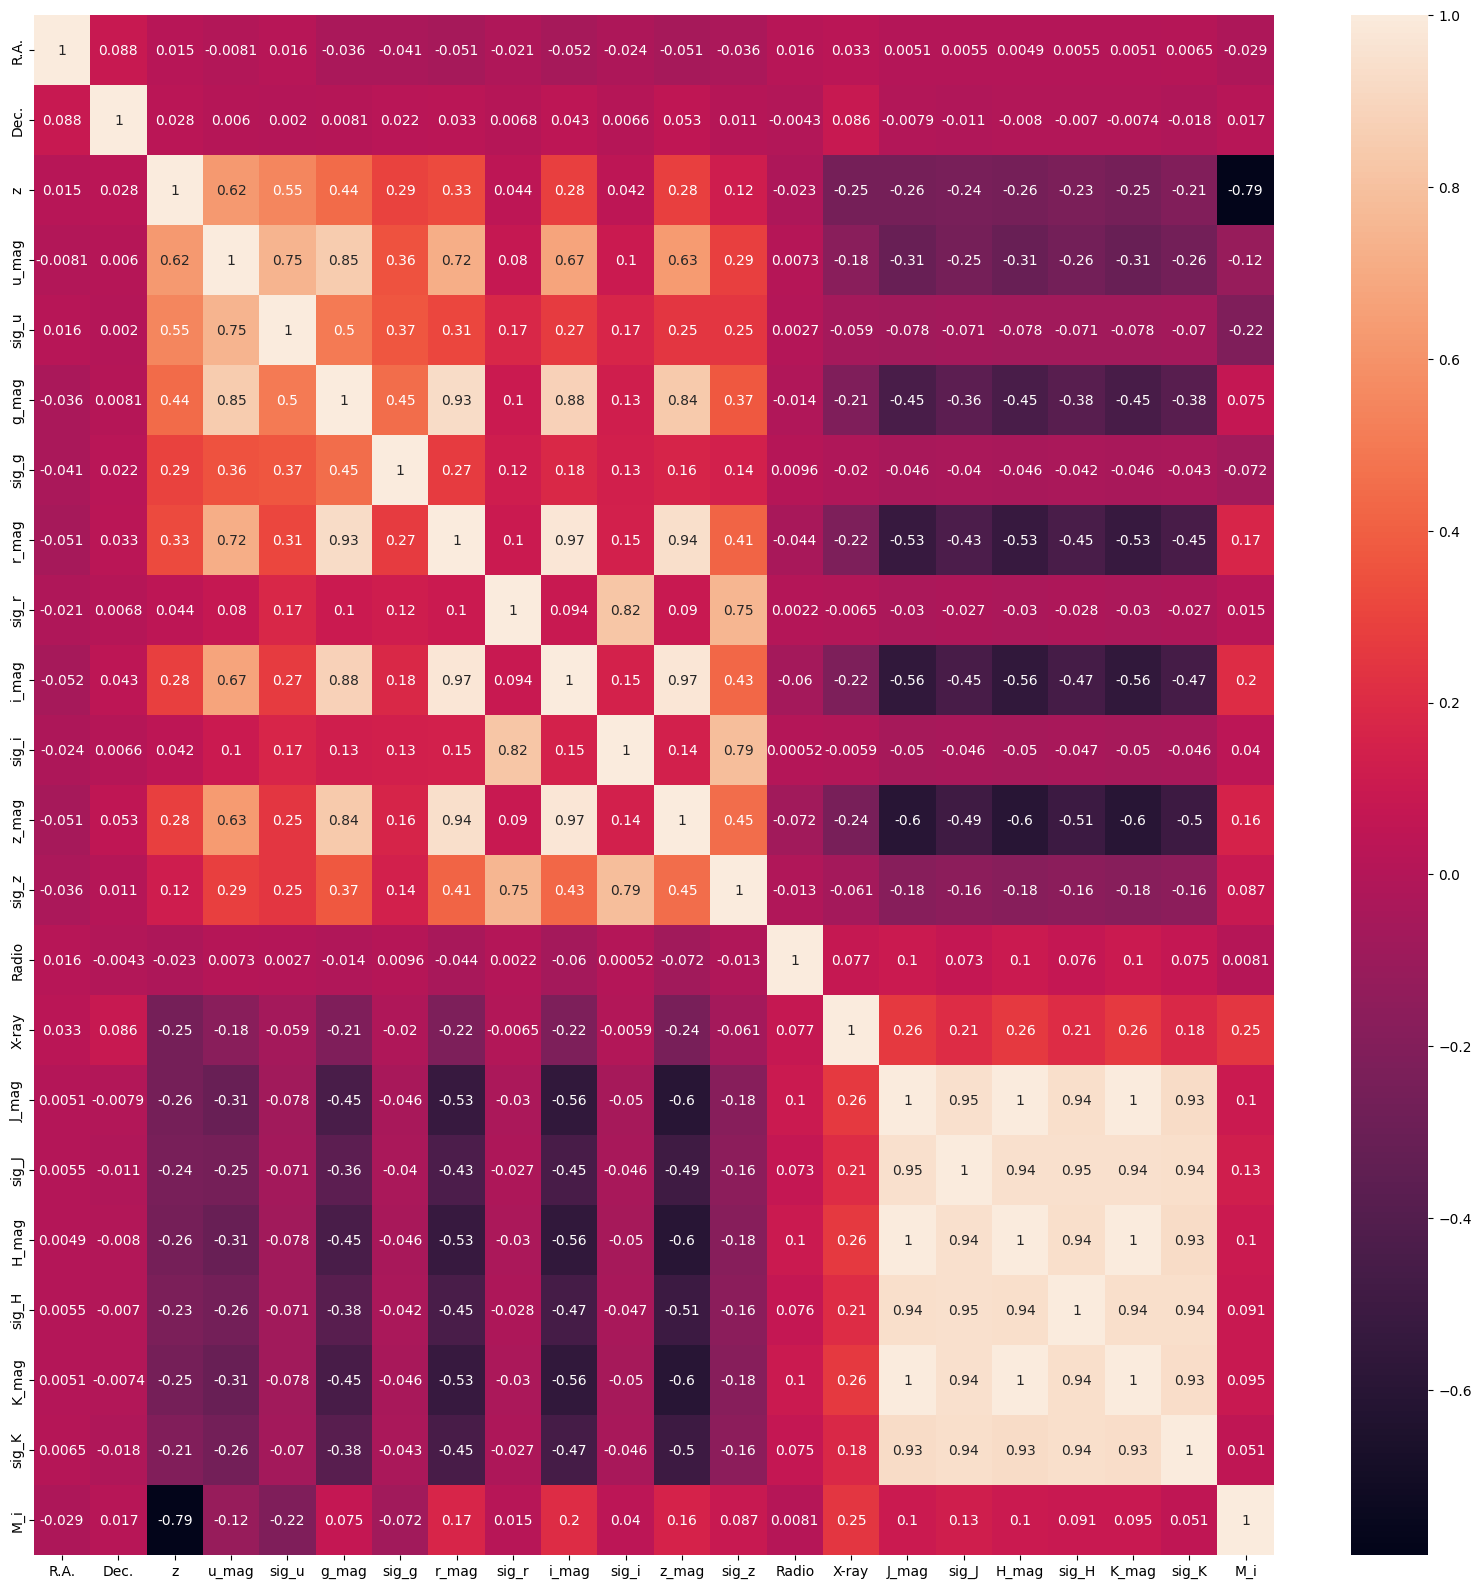

In [23]:
import seaborn as sb

plt.figure(figsize = (20, 20))
sb.heatmap(df.corr(), annot = True)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [39]:
i_mag, r_mag, z_mag = df['i_mag'], df['r_mag'], df['z_mag']

# ir_mag = np.empty(2, dtype=np.object_)
# # ir_mag[:] = i_mag, r_mag

# # ir_mag = np.array(i_mag, r_mag)

# ir_mag[0], ir_mag[1] = [], []
# ir_mag[0].append(i_mag)
# ir_mag[1].append(r_mag)

i_mag_train, i_mag_test, r_mag_train, r_mag_test, z_mag_train, z_mag_test = train_test_split(i_mag, r_mag, z_mag)
print(i_mag_train.shape)
print(r_mag_train.shape)
print(z_mag_train.shape)

(34815,)
(34815,)
(34815,)


In [40]:
i_mag_train = np.array(i_mag_train)
r_mag_train = np.array(r_mag_train)

i_mag_train = np.expand_dims(i_mag_train, axis = 1)
r_mag_train = np.expand_dims(r_mag_train, axis = 1)

x_train = np.hstack((i_mag_train, r_mag_train))

#np.array([i_mag_train, r_mag_train])
y_train = np.array(z_mag_train)

print(x_train[0], y_train[0])

[19.577 20.498] 19.437


In [41]:
i_mag_test = np.array(i_mag_test)
r_mag_test = np.array(r_mag_test)

i_mag_test = np.expand_dims(i_mag_test, axis = 1)
r_mag_test = np.expand_dims(r_mag_test, axis = 1)

x_test = np.hstack((i_mag_test, r_mag_test))

y_test = np.array(z_mag_test)

print(x_test[0], y_test[0])

[19.696 19.693] 19.445


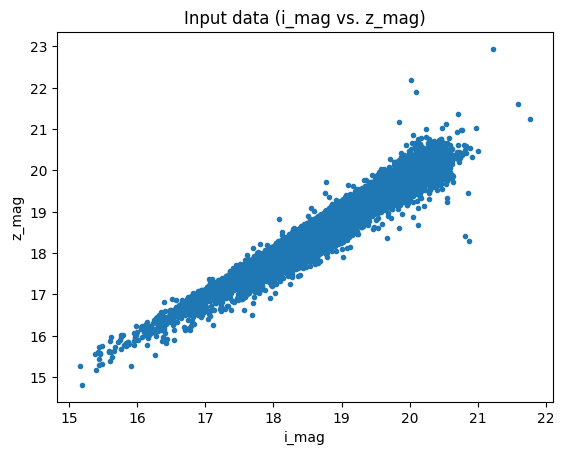

<Figure size 640x480 with 0 Axes>

In [42]:
plt.plot(i_mag_train, y_train, '.', zorder = 2)
plt.xlabel('i_mag')
plt.ylabel('z_mag')
plt.title('Input data (i_mag vs. z_mag)')
# plt.legend(['Model', 'Ground truth'], loc = 'lower right')
plt.show()
plt.clf()

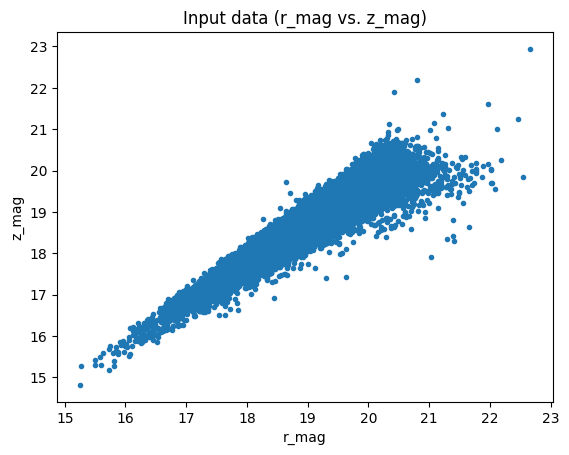

<Figure size 640x480 with 0 Axes>

In [43]:
plt.plot(r_mag_train, y_train, '.')
plt.xlabel('r_mag')
plt.ylabel('z_mag')
plt.title('Input data (r_mag vs. z_mag)')
# plt.legend(['Model', 'Ground truth'], loc = 'lower right')
plt.show()
plt.clf()

In [45]:
# ir_mag = np.empty(2, dtype=np.object_)
# ir_mag[:] = i_mag, r_mag

# ir_mag = np.array(i_mag, r_mag)

# i_mag_train, i_mag_test, r_mag_train, r_mag_test = train_test_split(i_mag, r_mag, random_state = 4)

validation_split = 0.2
batch_size = 100
Nepochs = 100
dropout_value = 0.2
learning_rate = 0.01

model_ir = keras.models.Sequential()

model_ir.add(keras.layers.Dense(128, input_dim = 2, activation = tf.keras.layers.LeakyReLU(alpha = 0.05)))
model_ir.add(keras.layers.Dropout(0.15))
model_ir.add(keras.layers.Dense(64, activation = tf.keras.layers.LeakyReLU(alpha = 0.05)))
model_ir.add(keras.layers.Dropout(0.1))
model_ir.add(keras.layers.Dense(32, activation = tf.keras.layers.LeakyReLU(alpha = 0.15)))
model_ir.add(keras.layers.Dropout(0.175))
model_ir.add(keras.layers.Dense(16, activation = tf.keras.layers.LeakyReLU(alpha = 0.1)))
model_ir.add(keras.layers.Dropout(0.2))
model_ir.add(keras.layers.Dense(1))

loss_fn_ir = tf.keras.losses.MeanSquaredError()

model_ir.compile(optimizer = tf.optimizers.Adam(learning_rate = learning_rate), loss = loss_fn_ir)

history_ir = model_ir.fit(x_train, y_train, validation_split = validation_split, batch_size = batch_size, epochs = Nepochs)


Epoch 1/100
279/279 [==============================] - 3s 5ms/step - loss: 18.2673 - val_loss: 1.2160
Epoch 2/100
279/279 [==============================] - 1s 3ms/step - loss: 8.6598 - val_loss: 2.0996
Epoch 3/100
279/279 [==============================] - 2s 6ms/step - loss: 7.1381 - val_loss: 0.9833
Epoch 4/100
279/279 [==============================] - 1s 4ms/step - loss: 5.6873 - val_loss: 0.5424
Epoch 5/100
279/279 [==============================] - 1s 3ms/step - loss: 4.7248 - val_loss: 0.7953
Epoch 6/100
279/279 [==============================] - 1s 3ms/step - loss: 4.0435 - val_loss: 0.5552
Epoch 7/100
279/279 [==============================] - 2s 6ms/step - loss: 3.4942 - val_loss: 0.6068
Epoch 8/100
279/279 [==============================] - 1s 4ms/step - loss: 3.1278 - val_loss: 0.5686
Epoch 9/100
279/279 [==============================] - 1s 3ms/step - loss: 2.8074 - val_loss: 0.5571
Epoch 10/100
279/279 [==============================] - 1s 4ms/step - loss: 2.4368 - val_l

279/279 [==============================] - 2s 6ms/step - loss: 0.1033 - val_loss: 0.0440
Epoch 82/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0743 - val_loss: 0.0316
Epoch 83/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0769 - val_loss: 0.0477
Epoch 84/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0736 - val_loss: 0.0416
Epoch 85/100
279/279 [==============================] - 1s 5ms/step - loss: 0.0668 - val_loss: 0.0688
Epoch 86/100
279/279 [==============================] - 1s 4ms/step - loss: 0.0671 - val_loss: 0.0591
Epoch 87/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0717 - val_loss: 0.0391
Epoch 88/100
279/279 [==============================] - 1s 3ms/step - loss: 0.0780 - val_loss: 0.0427
Epoch 89/100
279/279 [==============================] - 1s 5ms/step - loss: 0.0652 - val_loss: 0.0635
Epoch 90/100
279/279 [==============================] - 1s 4ms/step - loss: 0.0742 - val_loss: 

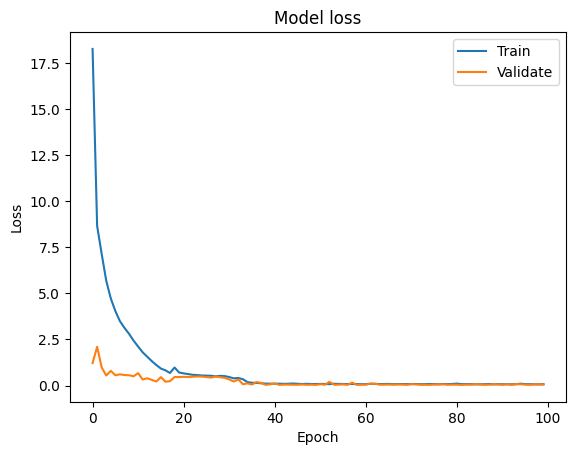

	MSE loss = 0.0724719911813736

363/363 - 0s - loss: 0.0552 - 474ms/epoch - 1ms/step
363/363 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

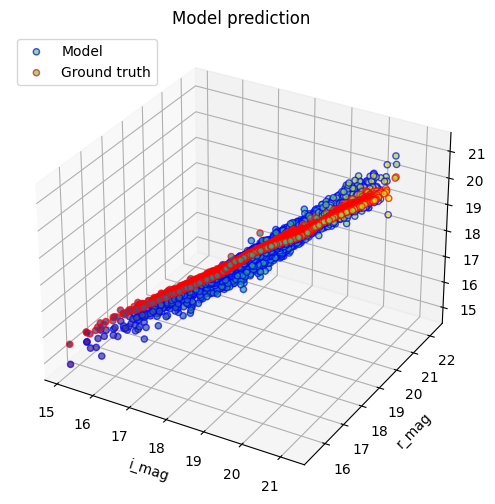

<Figure size 640x480 with 0 Axes>

In [46]:
plt.plot(history_ir.history['loss'])
plt.plot(history_ir.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validate'], loc = 'upper right')
plt.show()
plt.clf()

print("\tMSE loss = {:}\n".format(history_ir.history['loss'][-1]))

loss_ir = model_ir.evaluate(x_test, y_test, verbose = 2)

y_predict_ir = model_ir.predict(x_test)

x = i_mag_test
y = r_mag_test
z = y_predict_ir

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(i_mag_test, r_mag_test, z_mag_test, linewidths = 1, alpha = 0.7, edgecolor = 'b', s = 20, c = z)
ax.scatter(i_mag_test, r_mag_test, y_predict_ir, linewidths = 1, alpha = 0.7, edgecolor = 'r', s = 20, c = z)

ax.set_xlabel('i_mag')
ax.set_ylabel('r_mag')
ax.set_zlabel('z_mag')

# plt.plot(x_test, y_predict_ir, 'r.', zorder = 2)
# plt.scatter(x_test, y_test, zorder = 1)
plt.title('Model prediction')
plt.legend(['Model', 'Ground truth'], loc = 'upper left')
plt.show()
plt.clf()

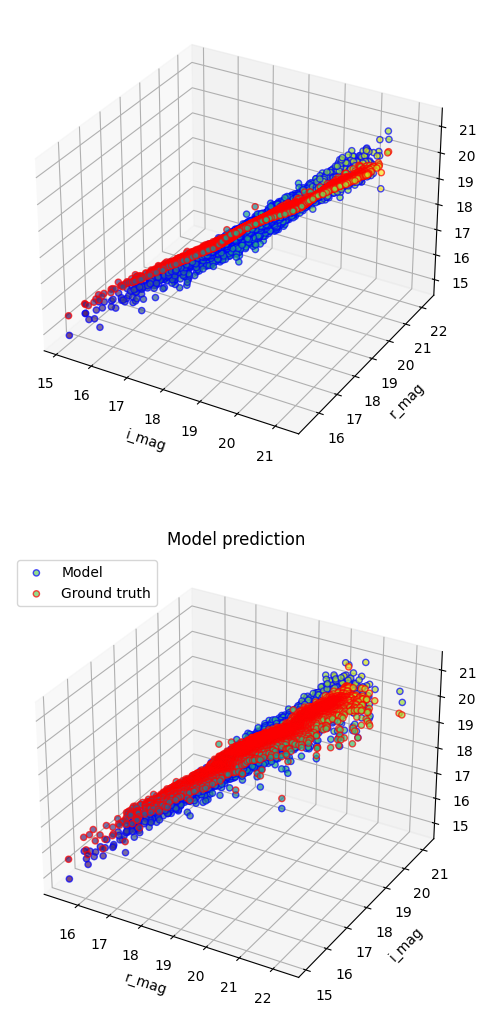

<Figure size 640x480 with 0 Axes>

In [47]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(311, projection = '3d')
ax1.scatter(i_mag_test, r_mag_test, z_mag_test, linewidths = 1, alpha = 0.7, edgecolor = 'b', s = 20, c = z)
ax1.scatter(i_mag_test, r_mag_test, y_predict_ir, linewidths = 1, alpha = 0.7, edgecolor = 'r', s = 20, c = z)

ax1.set_xlabel('i_mag')
ax1.set_ylabel('r_mag')
ax1.set_zlabel('z_mag')

ax2 = fig.add_subplot(312, projection = '3d')
ax2.scatter(r_mag_test, i_mag_test, z_mag_test, linewidths = 1, alpha = 0.7, edgecolor = 'b', s = 20, c = z)
ax2.scatter(r_mag_test, i_mag_test, y_predict_ir, linewidths = 1, alpha = 0.7, edgecolor = 'r', s = 20, c = z)

ax2.set_xlabel('r_mag')
ax2.set_ylabel('i_mag')
ax2.set_zlabel('z_mag')

# plt.plot(x_test, y_predict_ir, 'r.', zorder = 2)
# plt.scatter(x_test, y_test, zorder = 1)
plt.title('Model prediction')
plt.legend(['Model', 'Ground truth'], loc = 'upper left')
plt.show()
plt.clf()

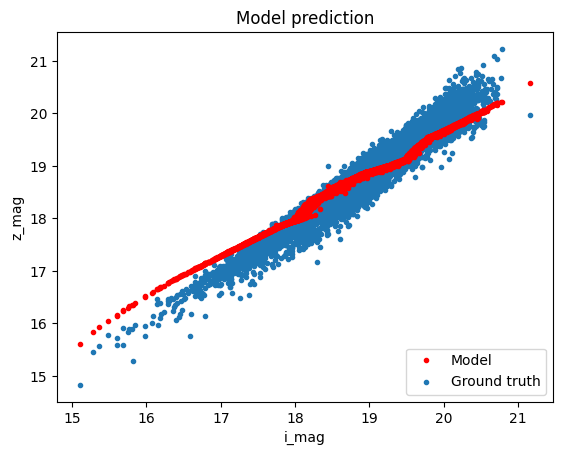

<Figure size 640x480 with 0 Axes>

In [48]:
plt.plot(i_mag_test, y_predict_ir, 'r.', zorder = 2)
plt.scatter(i_mag_test, y_test, marker = '.', zorder = 1)
plt.xlabel('i_mag')
plt.ylabel('z_mag')
plt.title('Model prediction')
plt.legend(['Model', 'Ground truth'], loc = 'lower right')
plt.show()
plt.clf()

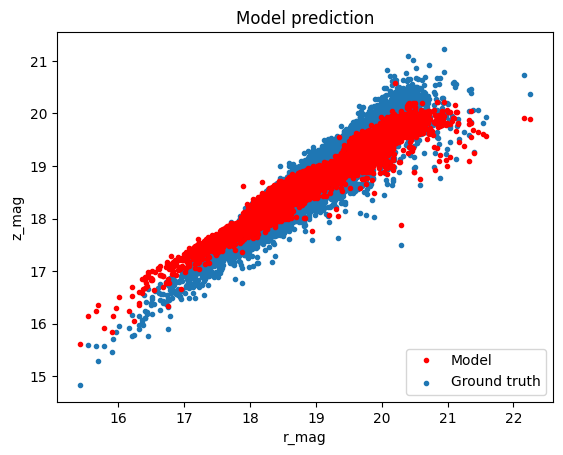

<Figure size 640x480 with 0 Axes>

In [49]:
plt.plot(r_mag_test, y_predict_ir, 'r.', zorder = 2)
plt.scatter(r_mag_test, y_test, marker = '.', zorder = 1)
plt.xlabel('r_mag')
plt.ylabel('z_mag')
plt.title('Model prediction')
plt.legend(['Model', 'Ground truth'], loc = 'lower right')
plt.show()
plt.clf()

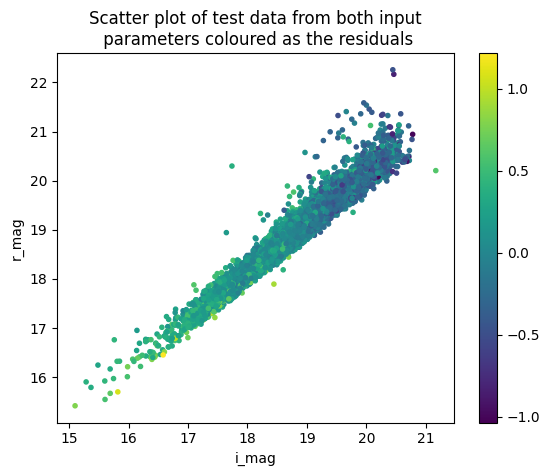

In [51]:
delta = []

for i in range(len(y_predict_ir)):
    delta_temp = y_predict_ir[i] - y_test[i]
    delta.append(delta_temp)

plt.scatter(i_mag_test, r_mag_test, c = delta, marker = '.')
plt.xlabel('i_mag')
plt.ylabel('r_mag')
plt.title('Scatter plot of test data from both input\n parameters coloured as the residuals')
plt.colorbar()